Problem Statement:

Heart disease remains a leading cause of death globally, and Kenya is no exception. Early prediction and prevention can significantly reduce mortality rates. This project aims to develop a machine learning model to predict heart disease risk based on patient data, enabling early intervention and better healthcare decisions.

Objectives:

i.Identify key risk factors contributing to heart disease in the dataset.

ii.Develop a predictive model for heart disease detection.

iii.Provide insights into heart disease trends that could be applicable to Kenya.

iv.Offer recommendations for preventive healthcare measures.

Stakeholders:

i.Medical Practitioners: Use insights to assess patient risks early.

ii.Public Health Authorities: Inform policy decisions and awareness campaigns.

iii.Insurance Companies: Evaluate risk for medical coverage plans.

iv.Patients & General Public: Awareness and lifestyle modification.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [27]:
import pandas as pd

# Load dataset
file_path = "/mnt/data/heart_disease.csv"  # Update with correct file path
df = pd.read_csv('heart_disease.csv')

# 1. Basic dataset info
df.info()
print("\nUnique values in target variable:", df['Heart Disease Status'].unique())

# 2. Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values[missing_values > 0])

# 3. Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# 4. Convert categorical values (Yes/No -> 1/0)
categorical_cols = ['Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure',
                    'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption',
                    'Stress Level', 'Sugar Consumption', 'Heart Disease Status']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# 5. Handle missing values (Fill numerical with median, categorical with mode)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    if col in df.columns and not df[col].mode().empty:
        df[col].fillna(df[col].mode().iloc[0], inplace=True)

# Save cleaned dataset
df.to_csv("cleaned_heart_disease.csv", index=False)
print("\nData cleaning complete. Cleaned file saved.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   9968 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

c:\Users\pc\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



Data cleaning complete. Cleaned file saved.



Summary statistics:
                Age  Blood Pressure  Cholesterol Level       Smoking  \
count  10000.000000    10000.000000       10000.000000  10000.000000   
mean      49.295400      149.758200         225.427300      0.514800   
std       18.167574       17.556268          43.510401      0.499806   
min       18.000000      120.000000         150.000000      0.000000   
25%       34.000000      134.000000         187.000000      0.000000   
50%       49.000000      150.000000         226.000000      1.000000   
75%       65.000000      165.000000         263.000000      1.000000   
max       80.000000      180.000000         300.000000      1.000000   

       Family Heart Disease      Diabetes           BMI  High Blood Pressure  \
count          10000.000000  10000.000000  10000.000000         10000.000000   
mean               0.497500      0.495200     29.077274             0.504800   
std                0.500019      0.500002      6.300156             0.500002   
min       

<Figure size 864x432 with 0 Axes>

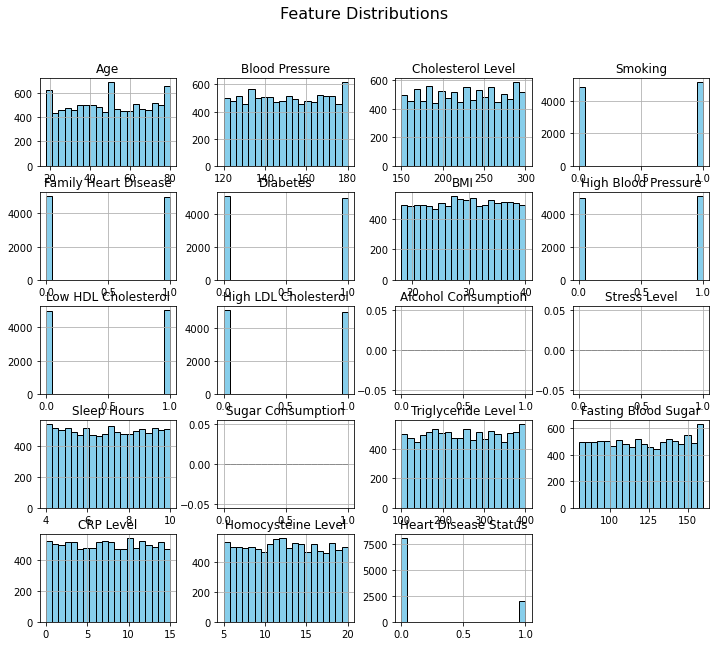

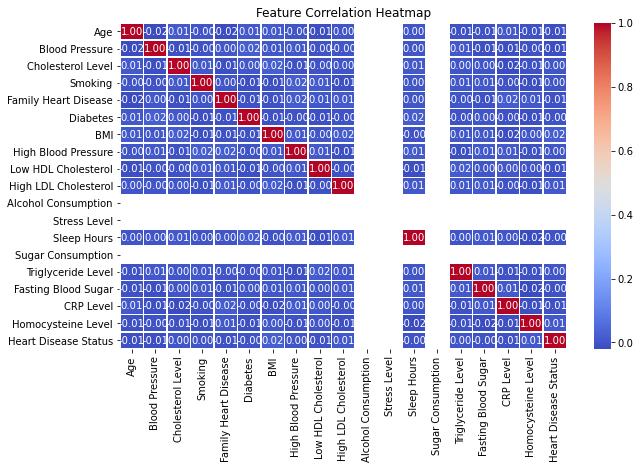

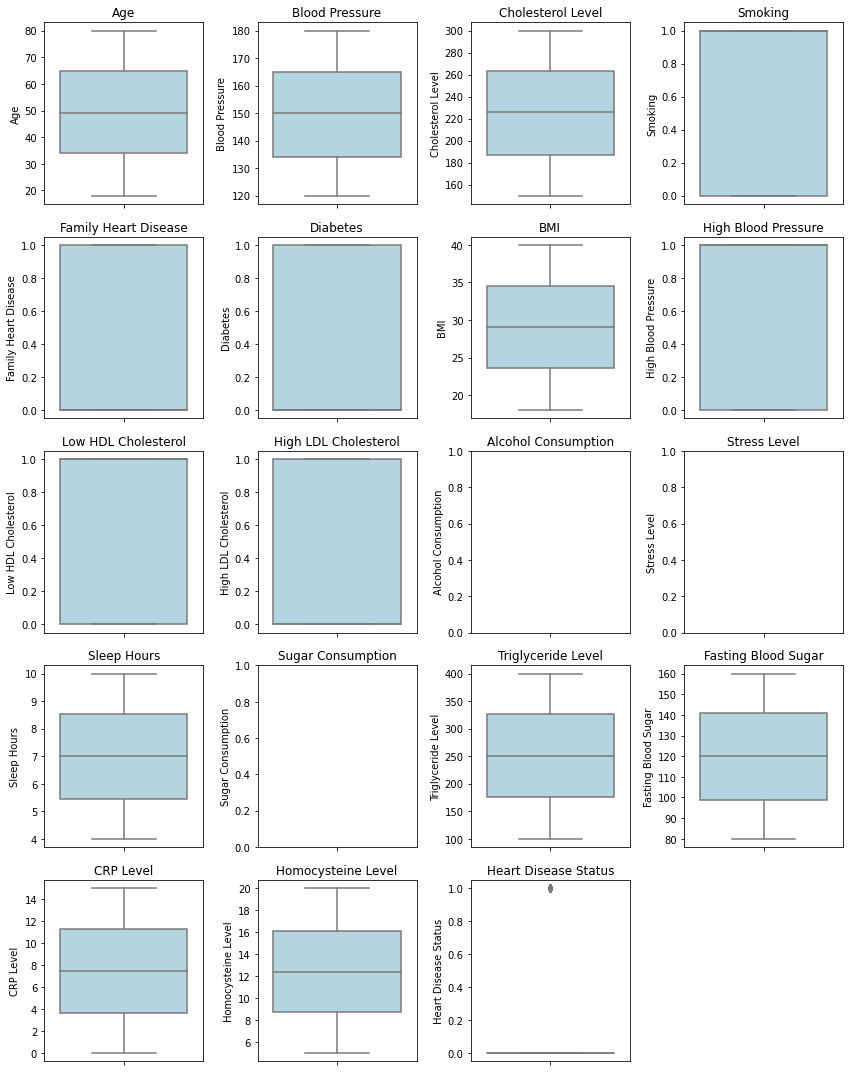

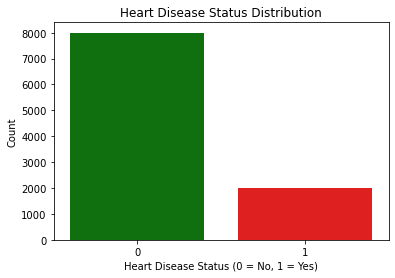


EDA complete!


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load cleaned dataset
file_path = "cleaned_heart_disease.csv"
df = pd.read_csv(file_path)

# 1. Summary statistics
print("\nSummary statistics:")
print(df.describe())

# 2. Visualizing distributions
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Boxplots to check for outliers
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_features = len(num_cols)
rows = math.ceil(num_features / 4)  # Adjust rows dynamically

plt.figure(figsize=(12, rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(rows, 4, i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

# 5. Checking class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Heart Disease Status'], palette=['green', 'red'])
plt.title("Heart Disease Status Distribution")
plt.xlabel("Heart Disease Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print("\nEDA complete!")


In [33]:
# 6. Feature Engineering
# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Convert to string first
    df[col] = LabelEncoder().fit_transform(df[col])

# Feature Scaling
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Heart Disease Status')
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Splitting dataset
X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nFeature engineering complete! Dataset ready for modeling.")



Feature engineering complete! Dataset ready for modeling.


c:\Users\pc\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\pc\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [40]:
# 7. Feature Engineering
# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Convert to string first
    df[col] = LabelEncoder().fit_transform(df[col])
    

# Feature Scaling
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Heart Disease Status', errors='ignore')
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Splitting dataset
X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 8. Model Training - Logistic Regression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 9. Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nFeature engineering and model training complete! Dataset is ready for further analysis.")


c:\Users\pc\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\pc\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').